In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
dataset = pd.read_csv(r"C:\Users\Aamir Shahzad\OneDrive\Desktop\house-price-app\Housing.Price_Dataset.csv")

In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [7]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
dataset.shape

(21613, 21)

In [9]:
dataset = dataset.drop(["id","date","zipcode"], axis=1)

In [10]:
dataset.shape

(21613, 18)

In [11]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [13]:
print(dataset.skew())

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


In [14]:
dataset = dataset.drop(["sqft_lot","sqft_lot15"], axis=1)

In [15]:
dataset.shape

(21613, 16)

In [16]:
dataset['price_log'] = np.log1p(dataset["price"])
dataset['sqft_living_log'] = np.log1p(dataset['sqft_living'])
dataset['sqft_above_log'] = np.log1p(dataset['sqft_above'])
dataset['sqft_basement_log'] = np.log1p(dataset['sqft_basement'])
dataset.drop(['sqft_living', 'sqft_above', 'sqft_basement'], axis=1, inplace=True)

In [17]:
dataset['view'] = dataset['view'].apply(lambda x: 0 if x == 0 else 1)
dataset['yr_renovated'] = dataset['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [18]:
dataset.shape

(21613, 17)

In [19]:
dataset.skew()

price                 4.024069
bedrooms              1.974300
bathrooms             0.511108
floors                0.616177
waterfront           11.385108
view                  2.699187
condition             1.032805
grade                 0.771103
yr_built             -0.469805
yr_renovated          4.549026
lat                  -0.485270
long                  0.885053
sqft_living15         1.108181
price_log             0.428077
sqft_living_log      -0.034727
sqft_above_log        0.254034
sqft_basement_log     0.484603
dtype: float64

In [20]:
dataset['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [21]:
dataset = dataset[dataset['bedrooms'] <= 11]

In [22]:
dataset['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [23]:
columns_to_clean = [
     'price_log', 'sqft_living_log',
    'sqft_above_log', 'sqft_basement_log', 'sqft_living15','sqft_living_log'
]

for col in columns_to_clean:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    dataset = dataset[(dataset[col] >= lower) & (dataset[col] <= upper)]

In [24]:
dataset.shape

(20745, 17)

In [25]:
numeric_col = dataset.select_dtypes(["float64","int64"])
numeric_col = numeric_col.drop(["price","price_log"], axis=1)

In [26]:
numeric_col.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_living_log', 'sqft_above_log', 'sqft_basement_log'],
      dtype='object')

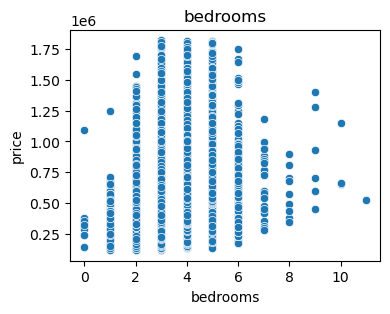

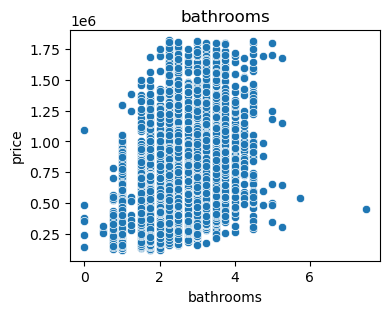

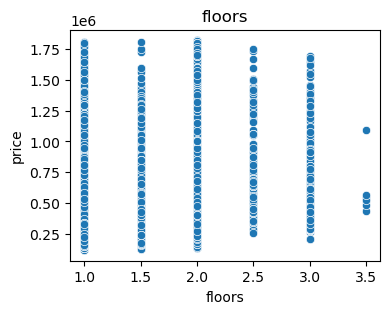

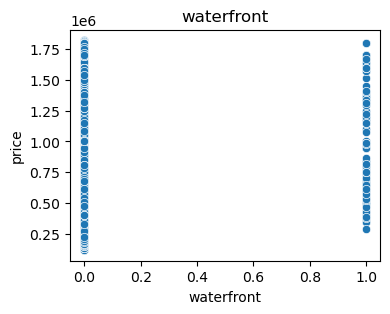

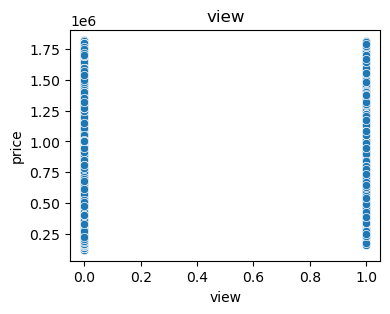

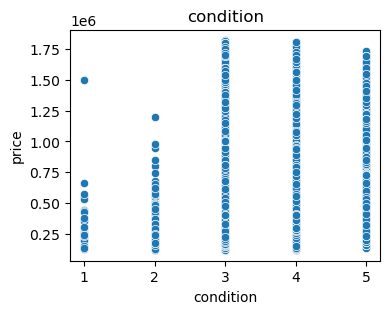

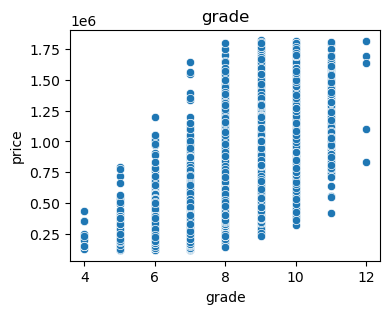

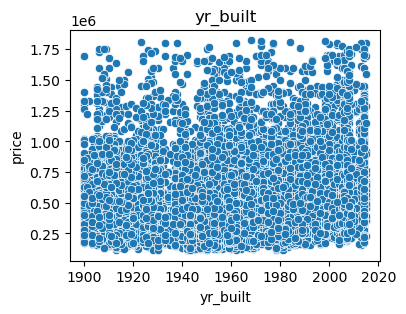

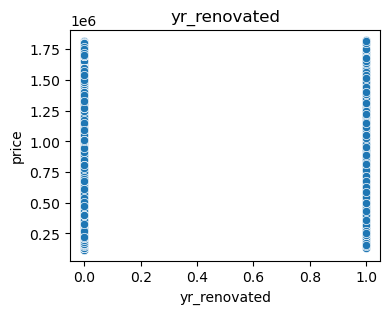

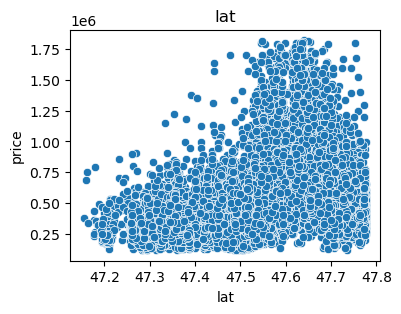

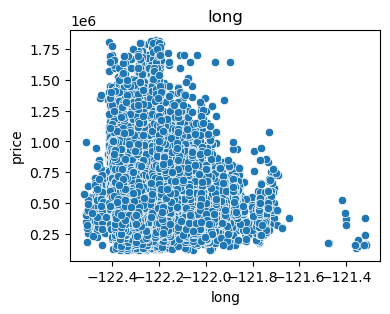

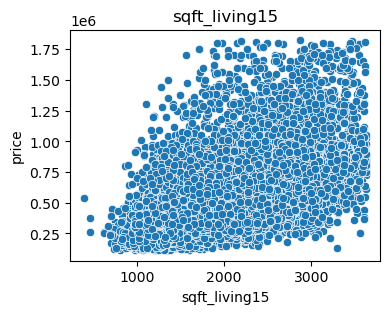

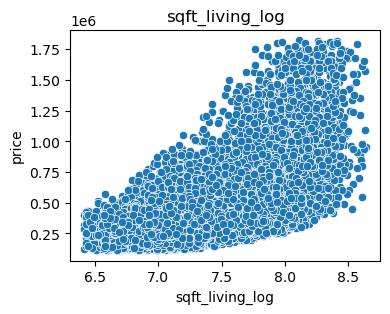

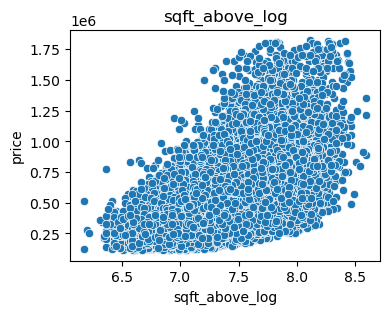

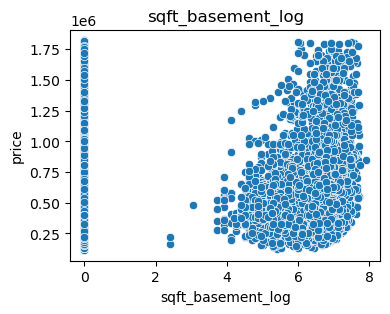

In [27]:
for i in numeric_col:
    plt.figure(figsize = (4,3))
    sns.scatterplot(x=i, y="price", data=dataset)
    plt.title(i)
    plt.show()

In [28]:
from scipy.stats import pearsonr, spearmanr
# Step 2: Loop for comparison
for col in numeric_col:
    # Drop NaN values for clean comparison
    temp_df = dataset[[col, 'price']].dropna()
    
    # Calculate Pearson & Spearman correlations
    pearson_corr, _ = pearsonr(temp_df[col], temp_df['price'])
    spearman_corr, _ = spearmanr(temp_df[col], temp_df['price'])

    print(f" Feature: {col}")
    print(f" =>  Pearson Correlation (Linear)   : {pearson_corr:.4f}")
    print(f" =>  Spearman Correlation (Monotonic): {spearman_corr:.4f}")

    # Decision
    if abs(spearman_corr - pearson_corr) > 0.2:
        print("Possible NON-LINEAR relationship\n")
    else:
        print("Likely LINEAR relationship\n")


 Feature: bedrooms
 =>  Pearson Correlation (Linear)   : 0.2942
 =>  Spearman Correlation (Monotonic): 0.3049
Likely LINEAR relationship

 Feature: bathrooms
 =>  Pearson Correlation (Linear)   : 0.4612
 =>  Spearman Correlation (Monotonic): 0.4502
Likely LINEAR relationship

 Feature: floors
 =>  Pearson Correlation (Linear)   : 0.2617
 =>  Spearman Correlation (Monotonic): 0.2950
Likely LINEAR relationship

 Feature: waterfront
 =>  Pearson Correlation (Linear)   : 0.1353
 =>  Spearman Correlation (Monotonic): 0.0831
Likely LINEAR relationship

 Feature: view
 =>  Pearson Correlation (Linear)   : 0.3007
 =>  Spearman Correlation (Monotonic): 0.2517
Likely LINEAR relationship

 Feature: condition
 =>  Pearson Correlation (Linear)   : 0.0505
 =>  Spearman Correlation (Monotonic): 0.0254
Likely LINEAR relationship

 Feature: grade
 =>  Pearson Correlation (Linear)   : 0.6397
 =>  Spearman Correlation (Monotonic): 0.6190
Likely LINEAR relationship

 Feature: yr_built
 =>  Pearson Correla

In [29]:
x = dataset.drop(["price","price_log"], axis=1)
y = dataset['price_log']

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**XGBRegressor**

In [33]:
from xgboost import XGBRegressor

In [34]:
xgb = XGBRegressor(
    subsample = 1.0,
    n_estimators = 1000,
    max_depth = 7,
    learning_rate = 0.05,
    gamma = 0.1,
    colsample_bytree = 0.6,
    random_state=42
)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
xgb.score(x_test, y_test)*100, xgb.score(x_train, y_train)*100

(88.23732225714703, 91.52010319202249)

In [36]:
y_pred = xgb.predict(x_test)

In [37]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2*100)

R² Score: 88.23732225714703


In [38]:
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)

mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

print("MAE (Original Price):", mae)
print("RMSE (Original Price):", rmse)

MAE (Original Price): 59734.63930314534
RMSE (Original Price): 92035.92299791216


**RandomForestRegressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rr = RandomForestRegressor(
    n_estimators = 500,
    min_samples_split = 10,
    min_samples_leaf = 1,
    max_features = 'log2',
    max_depth = 20,
    random_state=42,
    bootstrap = False
)
rr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='log2',
                      min_samples_split=10, n_estimators=500, random_state=42)

In [41]:
rr.score(x_test, y_test)*100, rr.score(x_train, y_train)*100

(86.31963869081692, 96.89067627045041)

In [42]:
y_pred1 = rr.predict(x_test)

In [43]:
r_2 = r2_score(y_test, y_pred)
print("R² Score:", r_2*100)

R² Score: 88.23732225714703


In [44]:
y_test_original1 = np.expm1(y_test)
y_pred_original1 = np.expm1(y_pred)

mae1 = mean_absolute_error(y_test_original, y_pred_original1)
rmse1 = np.sqrt(mean_squared_error(y_test_original, y_pred_original1))

print("MAE (Original Price):", mae1)
print("RMSE (Original Price):", rmse1)

MAE (Original Price): 59734.63930314534
RMSE (Original Price): 92035.92299791216
